In [1]:
from io import StringIO
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import datetime
import time


In [2]:
Stock_list = pd.read_csv('name.csv')['name']
date = pd.read_csv('date.csv')['date']
Stock = pd.read_csv('model.csv')
Stock = Stock.drop_duplicates()

import sys
import math

for i in Stock.columns:
    for j in range(len(Stock)) :
        K = Stock[i][j]
        if K > sys.maxsize:
            print ('inf' , i , j)
        try :
            if math.isnan(K):
                print ('nan' , i , j)
        except Exception as e:
            print(e, i)

def rise_estimate(df, day , upper , lower):
    i=0
    label = "p" + str(day) + "_" + str(upper)
    list_ = []
    while i < len(df):
        try :
            U =(max(df['收盤價'][i+1:i+day+1])-float(df['開盤價'][i+1]))/float(df['開盤價'][i+1]+0.0001)
            
            if U > upper :
                list_.append(1)
            else :
                list_.append(0)
        except Exception as e:
            print(e, i )
            list_.append(0)
        i+=1
    df[label] = list_

In [5]:
def shift_rise_estimate(df, day , upper ):
    i=0
    label = "pre" + str(day) + "r" + str(upper)
    list_ = [0 for x in range(day)]
    while i < (len(df) -day):
        try :
        
            U =(max(df['最高價'][i+1:i+day+1])-float(df['開盤價'][i+1]))/float(df['開盤價'][i+1])

            if U > upper :
                list_.append(1)
            else :
                list_.append(0)
                
        except Exception as e:
            print(e , i)
            list_.append(0)
        i+=1
    df[label] = list_

In [6]:
def shift_drop_estimate(df, day , upper ):
    i=0
    label = "pre" + str(day) + "d" + str(upper)
    list_ = [0 for x in range(day)]
    while i < (len(df) -day):
        try :
        
            U =(min(df['最低價'][i+1:i+day+1])-float(df['開盤價'][i+1]))/float(df['開盤價'][i+1])

            if -U > upper :
                list_.append(1)
            else :
                list_.append(0)
                
        except Exception as e:
            print(e , i)
            list_.append(0)
        i+=1
    df[label] = list_

In [7]:
day = 3
upper = 0.04
lower = -0.02
labelp = "p" + str(day) + "_" + str(upper)
labeld = "d" + str(day) + "_" + str(upper)
rise_estimate(Stock, day , upper , lower)
drop_estimate(Stock, day , upper , lower)

max() arg is an empty sequence 447093
min() arg is an empty sequence 447093


In [8]:
days = [5,3,1]
uppers = [0.1 , 0.05 ,0.03 ]
for i in range(len(days)):
    shift_rise_estimate(Stock, days[i] , uppers[i])
    shift_drop_estimate(Stock, days[i] , uppers[i])

In [9]:
Stock[-31:]

,證券代號,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,本益比,...,均買量,R_散戶,p3_0.04,d3_0.04,pre5r0.1,pre5d0.1,pre3r0.05,pre3d0.05,pre1r0.03,pre1d0.03
447064,9958.0,2403609.0,1628.0,274733064.0,114.5,116.5,112.0,114.0,0.5,32.11,...,168754.849659,-57.707467,0,0,0,0,1,0,0,0
447065,9958.0,3469662.0,2501.0,398730533.0,115.0,117.5,113.0,113.0,1.0,31.83,...,159428.378077,342.787036,0,0,0,0,0,0,0,0
447066,9958.0,2471162.0,1687.0,278512812.0,112.5,115.0,111.5,112.0,1.0,31.55,...,165093.448077,-61.729439,0,0,0,0,0,0,0,0
447067,9958.0,2246647.0,1450.0,251993682.0,114.0,114.5,110.5,110.5,1.5,31.13,...,173788.626353,9.627257,0,0,0,0,0,0,0,1
447068,9958.0,1593790.0,1152.0,178059267.0,111.0,113.0,111.0,111.5,1.0,31.41,...,154565.201766,85.305907,0,0,0,0,0,0,0,0
447069,9958.0,1800155.0,1221.0,203237248.0,112.5,114.0,111.5,113.5,2.0,31.97,...,166451.336240,319.910093,0,0,0,0,0,0,0,0
447070,9958.0,1289291.0,987.0,146716929.0,114.0,115.0,113.0,113.5,0.0,31.97,...,148649.220214,-279.034641,0,0,0,0,0,0,0,0
447071,9958.0,2102431.0,1506.0,236896082.0,114.0,114.5,111.5,112.0,1.5,31.55,...,157301.410822,-338.728714,0,0,0,0,0,0,0,0
447072,9958.0,936944.0,677.0,105584451.0,112.5,113.5,112.0,112.5,0.5,31.69,...,155959.076870,-124.815688,0,0,0,0,0,0,0,0
447073,9958.0,936944.0,677.0,105584451.0,112.5,113.5,112.0,112.5,0.5,31.69,...,155959.076870,-32097.300000,0,0,0,0,0,0,0,0


In [10]:
Klist = ['最高價','收盤價']

Stock['成交股數'].shift(+1)

i=0
while i<len(Klist):
    name=str(Klist[i])
    Stock[(name+"比率")]=""
    temp=Stock[name].shift(+1)
    Stock[(name+"比率")]=Stock[name]/(temp+0.000001)
    i+=1
Stock

,證券代號,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,本益比,...,p3_0.04,d3_0.04,pre5r0.1,pre5d0.1,pre3r0.05,pre3d0.05,pre1r0.03,pre1d0.03,最高價比率,收盤價比率
0,1102.0,7513759.0,4346.0,285110415.0,37.65,38.05,37.65,37.90,0.10,11.59,...,0,0,0,0,0,0,0,0,NaN,NaN
1,1102.0,7025972.0,3222.0,265972841.0,38.00,38.10,37.10,37.40,0.50,11.44,...,0,0,0,0,0,0,0,0,1.001314,0.986807
2,1102.0,6763011.0,4012.0,255739107.0,37.40,38.00,37.40,37.95,0.55,11.61,...,0,0,0,0,0,0,0,0,0.997375,1.014706
3,1102.0,12381905.0,4961.0,472115302.0,38.00,38.35,37.60,38.35,0.40,11.73,...,0,0,0,0,0,0,0,0,1.009210,1.010540
4,1102.0,12821758.0,6876.0,496478492.0,38.05,39.20,38.05,38.85,0.50,11.88,...,0,0,0,0,0,0,1,0,1.022164,1.013038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447089,9958.0,2665031.0,1876.0,287713936.0,107.00,109.00,106.50,108.00,1.50,25.17,...,0,0,0,0,0,0,0,0,1.013953,1.014084
447090,9958.0,4169026.0,2961.0,460613076.0,109.00,112.00,108.00,110.50,2.50,25.76,...,0,0,0,0,1,0,0,0,1.027523,1.023148
447091,9958.0,3507168.0,2536.0,381322603.0,111.50,112.00,107.00,108.00,2.50,25.17,...,0,0,0,0,0,0,0,1,1.000000,0.977376
447092,9958.0,6048171.0,3774.0,672012377.0,109.50,113.00,108.00,112.00,4.00,26.11,...,0,0,0,0,0,0,1,0,1.008929,1.037037


In [11]:
Stock.columns.values

array(['證券代號', '成交股數', '成交筆數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差',
       '本益比', '融資買', '融資賣', '融資餘', '融卷買', '融卷賣', '融卷餘', 'ratio', '外資進出',
       '外資進', '外資出', '投信進出', '投信進', '投信出', '自營進出', '自營進', '自營出', '避險進出',
       '避險進', '避險出', '三大', 'date', 'MA5', 'MA10', 'MA20', 'MA60', 'buy5',
       'buy10', '外5', '外10', '投5', '投10', '自5', '三大5', '三大10', 'MA交叉型態2',
       'K', 'D', 'KD交叉型態', 'KD交叉型態2', '漲跌', 'RSI5', 'MA5 slope',
       'MA10 slope', 'MA60 slope', 'ratio slope', 'margin slope',
       'short slope', '三大 slope', '外資5 slope', '投信5 slope', '自營 slope',
       'buy5 slope', 'buy10 slope', '金額 slope', 'RSI5鈍化', '外5金', '投5金',
       '自5金', '融資金', '融卷金', '實紅棒', '紅棒天線', '實黑棒', '黑棒天線', '上避雷針', '下避雷針',
       '連漲跌', 'D5', 'D60', 'D三大', 'D_upper_day', 'UD5', 'UD60', '均線糾結1',
       '均線糾結2', '三陽開泰', '前高', '波段前高', '突破前高', '均買量', 'R_散戶', 'p3_0.04',
       'd3_0.04', 'pre5r0.1', 'pre5d0.1', 'pre3r0.05', 'pre3d0.05',
       'pre1r0.03', 'pre1d0.03', '最高價比率', '收盤價比率'], dtype=object)

columns = Stock.columns
for l in range (len(Stock.columns)):
    if len(Stock[columns[l]].value_counts())<= 3:
        Rise = len(Stock[(Stock[columns[l]] > 0) & (Stock['p3_0.05'] ==1) ])
        Drop = len(Stock[(Stock[columns[l]] > 0) & (Stock['d3_0.05'] ==1) ])        
        print (columns[l] ," : " , Drop/(Rise+0.001) )


Stock[(Stock.突破前高 == 1) &(Stock.外資進 > 100000)][['外資進', '突破前高','p3_0.06']].hist()

In [12]:
Stock[labeld].value_counts()

0    406300
1     40794
Name: d3_0.04, dtype: int64

In [13]:
Stock[labelp].value_counts()

0    402578
1     44516
Name: p3_0.04, dtype: int64

## 只選top50
list_s = pd.read_csv('150股票代號.csv').代號

test = Stock [Stock.證券代號.isin(list_s[0:49])]
test[labelp].value_counts()

In [ ]:
Stock

In [14]:
test = Stock[Stock['成交金額'] > 300000000]


test = test[test['連漲跌'] > 0]


test = test[test['融資餘'] > 1000]
test = test[test['融卷餘'] > 10]

test[labelp].value_counts()


0    16197
1     3184
Name: p3_0.04, dtype: int64

day = [5]
upper = 0.1
lower = -0.05
for i in day:
    drop_estimate(Stock, i , upper , lower)

In [15]:
test.columns

Index(['證券代號', '成交股數', '成交筆數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差',
       '本益比',
       ...
       'p3_0.04', 'd3_0.04', 'pre5r0.1', 'pre5d0.1', 'pre3r0.05', 'pre3d0.05',
       'pre1r0.03', 'pre1d0.03', '最高價比率', '收盤價比率'],
      dtype='object', length=101)

In [16]:
for_model = test.drop([ '成交股數', '成交筆數', '成交金額', '開盤價', '最高價', '最低價', '收盤價',
        '漲跌價差', '融資買', '融資賣', '融資餘', '融卷買', '融卷賣', '融卷餘', '外資進出', '外資進', '外資出',  
        '三大', '外5', '投5', 'MA5', 'MA10', 'MA20', 'MA60', 'buy5', 'buy10','外10' , '投10', '自5', '三大5', '三大10',
       '投信進出', '投信進', '投信出', '自營進出', '自營進', '自營出', '避險進出', '避險進', '避險出','突破前高'
        ,'R_散戶','金額 slope' ,'前高', '波段前高'],axis = 1)

In [17]:
for_model.columns

Index(['證券代號', '本益比', 'ratio', 'date', 'MA交叉型態2', 'K', 'D', 'KD交叉型態',
       'KD交叉型態2', '漲跌', 'RSI5', 'MA5 slope', 'MA10 slope', 'MA60 slope',
       'ratio slope', 'margin slope', 'short slope', '三大 slope', '外資5 slope',
       '投信5 slope', '自營 slope', 'buy5 slope', 'buy10 slope', 'RSI5鈍化', '外5金',
       '投5金', '自5金', '融資金', '融卷金', '實紅棒', '紅棒天線', '實黑棒', '黑棒天線', '上避雷針',
       '下避雷針', '連漲跌', 'D5', 'D60', 'D三大', 'D_upper_day', 'UD5', 'UD60',
       '均線糾結1', '均線糾結2', '三陽開泰', '均買量', 'p3_0.04', 'd3_0.04', 'pre5r0.1',
       'pre5d0.1', 'pre3r0.05', 'pre3d0.05', 'pre1r0.03', 'pre1d0.03', '最高價比率',
       '收盤價比率'],
      dtype='object')

In [18]:
model = for_model[for_model['date'] >  date [len(date)-(70)]]
#normal = normal[normal[labelp] == 0]

#detect = for_model[for_model[labelp] == 1]
#detect = detect[for_model['date'] >  date [len(date)-(70)]]
#model = detect.append(normal)

In [19]:
model[labeld].value_counts()

0    14434
1     3256
Name: d3_0.04, dtype: int64

In [183]:
len(Stock|)

447094

In [20]:
model[labelp].value_counts()

0    14753
1     2937
Name: p3_0.04, dtype: int64

In [21]:
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import precision_score
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
flag = True
cost =  model[labelp].value_counts()[0] /  model[labelp].value_counts()[1]

In [138]:
drop_precision_test = pd.DataFrame()
precision_test = pd.DataFrame()

In [180]:
pre_date = []
pre = [] 
for i in range(30):
    K = i
    interval = 0
    t = model[model['date'] <= date [K]]

    trainp = t [t['date'] < date [K+interval] ]
    testp = t [t['date'] >= date [K+interval] ]
    #ros = RandomOverSampler(random_state42)

    X_train = trainp.drop(['date','證券代號', labelp,labeld ],axis = 1)
    y_train = trainp[labeld]

    X_test = testp.drop(['date', '證券代號',labelp,labeld],axis = 1)
    y_test = testp[labeld]

    #X_train, y_train = SMOTE(random_state=42).fit_resample(X_train, y_train)
    #ros = RandomOverSampler(random_state = 40)

    #X_train, y_train = ros.fit_resample(X_train, y_train)


    xgbc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
                  colsample_bynode=1, colsample_bytree=0.8, gamma=0.01, gpu_id=-1,
                  importance_type='gain', interaction_constraints='',
                  learning_rate=0.1, max_delta_step=0, max_depth=7,
                  min_child_weight=1, monotone_constraints='()',
                  n_estimators=400, n_jobs=4, nthread=4, num_parallel_tree=1,
                  random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=cost,
                  seed=27, subsample=0.8, tree_method='exact',
                  validate_parameters=1, verbosity=None)
    xgbc.fit(X_train,y_train)
    y_test_predp = xgbc.predict(X_test)
    y_train_predp = xgbc.predict(X_train)

    threshold = 0.6
    predicted_proba = xgbc.predict_proba(X_test)
    predicted = (predicted_proba [:,1] >= threshold).astype('int')
    
    if (len ( y_test[y_test == 1]) == 0) :
        pre.append(-0.1)
    else :
        pre.append(precision_score(y_test ,predicted))
    pre_date.append(date[i])
    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision 

y_train_predp = xgbc.predict(X_train)
confusion_matrix( y_train ,y_train_predp)

threshold = 0.6
predicted_proba = xgbc.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')
confusion_matrix(y_test, predicted)

In [144]:
index = pd.read_csv('Market_index.csv')
index = index[index['Index']=='發行量加權股價指數']

In [145]:
index = index[index.date >= pre_date[-1]]

index.sort_values(by=['date'] , ascending=True, axis =0 , inplace=True)

index = index.reset_index(drop=True)
index

,Index,收盤,漲跌,漲跌%,date
0,發行量加權股價指數,15953.80,498.38,-3.03,20210226
1,發行量加權股價指數,15946.88,6.92,-0.04,20210302
2,發行量加權股價指數,16211.73,264.85,1.66,20210303
3,發行量加權股價指數,15906.41,305.32,-1.88,20210304
4,發行量加權股價指數,15855.23,51.18,-0.32,20210305
5,發行量加權股價指數,15820.11,35.12,-0.22,20210308
6,發行量加權股價指數,15853.09,32.98,0.21,20210309
7,發行量加權股價指數,15911.67,58.58,0.37,20210310
8,發行量加權股價指數,16179.56,267.89,1.68,20210311
9,發行量加權股價指數,16255.18,75.62,0.47,20210312


In [140]:
precision_test['date'] = pre_date
precision_test['precision'] = pre

In [151]:
drop_precision_test['date'] = pre_date
drop_precision_test['precision'] = pre

Text(0.5, 1.0, 'precision v.s. ')

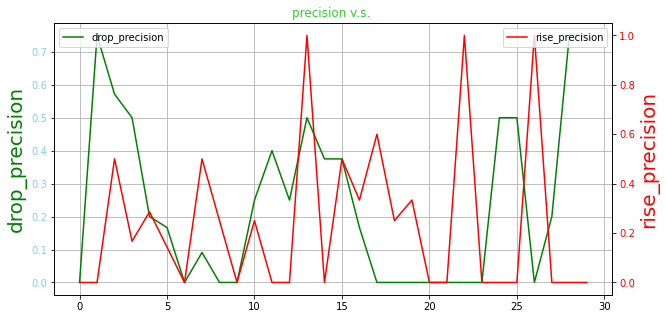

In [152]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(drop_precision_test.precision,color='green',label='drop_precision')
ax.set_ylabel('drop_precision',color='green',fontsize=20)
ax.tick_params(axis='y',labelcolor='skyblue')
plt.grid()
ax.legend(loc='upper left')

ax2=ax.twinx()
ax2.plot(precision_test.precision,color='red',label='rise_precision')
ax2.set_ylabel('rise_precision',color='red',fontsize=20)
ax2.tick_params(axis='y',labelcolor='red')
ax2.legend(loc='upper right')

plt.title('precision v.s. ', color='limegreen')


threshold = 0.3
i = 0
while i < 50 :
    threshold += (i/2000)
    predicted_proba = xgbc.predict_proba(X_test)
    predicted = (predicted_proba [:,1] >= threshold).astype('int')
    precision = precision_score(y_test, predicted)
    i+=1
    print (threshold ,' : ' ,precision)

Text(0.5, 1.0, 'precision v.s. Market ')

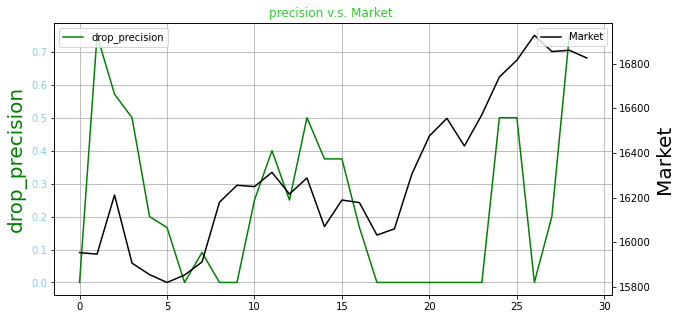

In [153]:

fig,ax=plt.subplots(figsize=(10,5))
ax.plot(drop_precision_test.precision,color='green',label='drop_precision')
ax.set_ylabel('drop_precision',color='green',fontsize=20)
ax.tick_params(axis='y',labelcolor='skyblue')
plt.grid()
ax.legend(loc='upper left')

ax2=ax.twinx()
ax2.plot(index.收盤,color='black',label='Market')
ax2.set_ylabel('Market',color='black',fontsize=20)
ax2.tick_params(axis='y',labelcolor='black')
ax2.legend(loc='upper right')

plt.title('precision v.s. Market ', color='limegreen')


Text(0.5, 1.0, 'precision v.s. Market ')

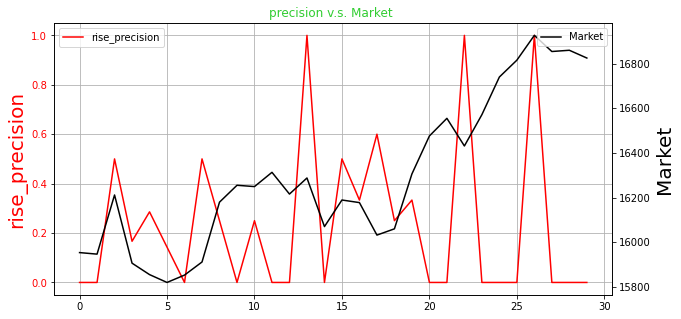

In [146]:

fig,ax=plt.subplots(figsize=(10,5))
ax.plot(precision_test.precision,color='red',label='rise_precision')
ax.set_ylabel('rise_rate',color='red',fontsize=20)
ax.tick_params(axis='y',labelcolor='red')
plt.grid()
ax.legend(loc='upper left')

ax2=ax.twinx()
ax2.plot(index.收盤,color='black',label='Market')
ax2.set_ylabel('Market',color='black',fontsize=20)
ax2.tick_params(axis='y',labelcolor='black')
ax2.legend(loc='upper right')

plt.title('precision v.s. Market ', color='limegreen')


Text(0.5, 1.0, 'precision v.s. Market ')

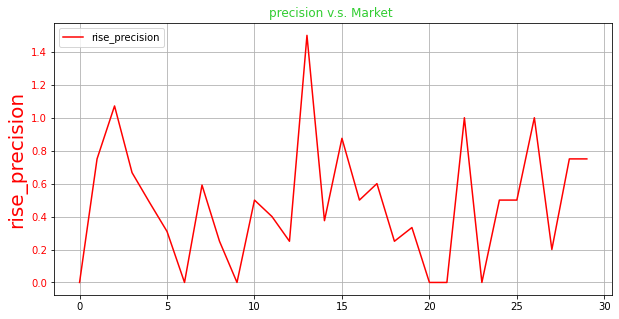

In [155]:

fig,ax=plt.subplots(figsize=(10,5))
ax.plot((precision_test.precision + drop_precision_test.precision),color='red',label='rise_precision')
ax.set_ylabel('rise_precision',color='red',fontsize=20)
ax.tick_params(axis='y',labelcolor='red')
plt.grid()
ax.legend(loc='upper left')


plt.title('precision v.s. Market ', color='limegreen')

In [83]:
selecte2.代號.value_counts()

2498    2
6591    1
2006    1
8105    1
4960    1
2332    1
1104    1
2010    1
1304    1
8215    1
9939    1
6438    1
6416    1
2323    1
6477    1
9802    1
2312    1
1312    1
2601    1
6116    1
1447    1
1527    1
5608    1
2486    1
3708    1
3003    1
2233    1
2104    1
4919    1
2102    1
1909    1
3060    1
3059    1
3437    1
2615    1
2607    1
8110    1
2477    1
2027    1
3049    1
9958    1
Name: 代號, dtype: int64

In [156]:
feature=pd.DataFrame()
feature['name'] = X_train.columns
feature['score'] = xgbc.feature_importances_

feature.sort_values(by=['score'] , ascending=False, axis =0 , inplace=True)

feature[0:50]

,name,score
28,紅棒天線,0.031976
35,D60,0.029147
38,UD5,0.027778
48,pre1r0.03,0.026555
40,均線糾結1,0.026147
27,實紅棒,0.025229
49,pre1d0.03,0.023496
25,融資金,0.022806
42,三陽開泰,0.022785
44,pre5r0.1,0.022523


In [149]:
feature=pd.DataFrame()
feature['name'] = X_train.columns
feature['score'] = xgbc.feature_importances_

feature.sort_values(by=['score'] , ascending=False, axis =0 , inplace=True)

feature[0:50]

,name,score
41,均線糾結2,0.044851
47,pre3d0.05,0.033531
49,pre1d0.03,0.025493
35,D60,0.023080
11,MA60 slope,0.021989
45,pre5d0.1,0.021747
38,UD5,0.021480
37,D_upper_day,0.020768
43,均買量,0.020452
34,D5,0.020378


In [218]:
import torch.nn as nn
import torch.nn.functional as F
import torch

In [219]:
import torch.utils.data as data
import io
import imageio
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
from tqdm import tqdm_notebook as tqdm #pip install tqdm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd
import numpy as np
import os

In [220]:
import torchvision.datasets as dset
import torchvision.transforms as transforms

ModuleNotFoundError: No module named 'torchvision'

In [ ]:
class network(nn.Module):
    def __init__(self):
        super(network,self).__init__()
        self.L1 = nn.Linear(58,30)
        self.L2 = nn.Linear(30,18)
        self.L3 = nn.Linear(18,10)
        self.L4 = nn.Linear(10,7)
        self.L5 = nn.Linear(7,4)
        self.output = nn.Linear(4,2)
    def forward(self , x):
        x = F.relu(self.L1(x))
        x = F.relu(self.L2(x))
        x = F.relu(self.L3(x))
        x = F.relu(self.L4(x))
        x = F.relu(self.L5(x))
        x = self.output(x)
        return x

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [ ]:
X_train, y_train = ros.fit_resample(X_train, y_train)

In [ ]:
from collections import Counter
print(sorted(Counter(y_train).items()))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_train = X_train_std 

sc.fit(X_test)
X_valid_std = sc.transform(X_test)
X_valid = X_valid_std

In [ ]:
X_train.shape,y_train.shape

In [ ]:
tensor_x = torch.from_numpy(X_train)
tensor_y = torch.from_numpy(y_train.to_numpy())
tensor_y = torch.squeeze(tensor_y)
tensor_x_test = torch.from_numpy(X_valid)
tensor_y_test = torch.from_numpy(y_test.to_numpy())
tensor_y_test = torch.squeeze(tensor_y_test)

In [ ]:
#trans = transforms.Compose([transforms.ToTensor()]) 
#train_set = dset.MNIST(root='.', train=True, download=True ,transform=trans)
#test_set = dset.MNIST(root='.', train=False,transform=trans)
train_set = data.TensorDataset(tensor_x,tensor_y)
test_set = data.TensorDataset(tensor_x_test,tensor_y_test)
train_dataset = data.DataLoader(dataset =  train_set,batch_size=100,shuffle=True)
test_dataset = data.DataLoader(dataset = test_set , batch_size=100)

In [ ]:
use_cuda = torch.cuda.is_available()
use_cuda

In [ ]:
use_cuda = torch.cuda.is_available()
net = network()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=net.parameters())
loss_history = []
if use_cuda:
    net = net.cuda()
for e in tqdm(range(30)):
    epoch_loss_sum = 0
    for x , y in tqdm(train_dataset):
        if use_cuda:
            x = x.cuda()
            y = y.cuda()
        batch_size = x.shape[0]
        x = x.view(batch_size,-1)
        net_out = net(x.float())
        loss = loss_fn(net_out , y)
        epoch_loss_sum += float(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss_history.append(epoch_loss_sum)

In [ ]:
correct_count = 0
total_testing = len(test_set)
for x,y in test_dataset:
    if use_cuda:
        x = x.cuda()
        y = y.cuda().detach()
    batch_size = x.shape[0]
    x = x.view(batch_size,-1)
    output = net(x.float()).max(1)[1] #output出來是一個向量
    correct_count += torch.sum(output==y).item()
    #print(torch.sum(output==y))
    #print("output = {}".format(output))
    #print("y = {}".format(y))
    #print("======")
#print(correct_count, total_testing)
#correct_count = correct_count
print('accuracy rate',correct_count/total_testing)

In [ ]:
y_pred = net(tensor_x_test.float()).max(1)[1]
y_prediction = y_pred.detach().cpu().numpy() 
y_prediction


In [ ]:
y_test2 = tensor_y_test.numpy()

In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix : ")
confusion_matrix(y_test,y_prediction)

In [ ]:
y_test.value_counts()